<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A larger example

In [1]:
# Import required libraries

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Read in the insurance dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
insurance_one_hot = pd.get_dummies(insurance)

insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [4]:
# Create X & y values (features and labels)

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [5]:
# create training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test), len(y), len(y_train), len(y_test)

(1338, 1070, 268, 1338, 1070, 268)

In [6]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,True,False,True,False,False,True,False,False
1285,47,24.32,0,True,False,True,False,True,False,False,False
1142,52,24.86,0,True,False,True,False,False,False,True,False
969,39,34.32,5,True,False,True,False,False,False,True,False
486,54,21.47,3,True,False,True,False,False,True,False,False


In [7]:
np.asarray(X_train).astype(np.float32)

array([[46.   , 19.95 ,  2.   , ...,  1.   ,  0.   ,  0.   ],
       [47.   , 24.32 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [52.   , 24.86 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [58.   , 25.175,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [37.   , 47.6  ,  2.   , ...,  0.   ,  0.   ,  1.   ],
       [55.   , 29.9  ,  0.   , ...,  0.   ,  0.   ,  1.   ]],
      dtype=float32)

In [8]:
tf.random.set_seed(42)

# 1. Create a model

insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)])

#2. Compile the model

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

#3. Fit the model

insurance_model.fit(np.asarray(X_train).astype(np.float32), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8648.9707 - mae: 8648.9707
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7833.9888 - mae: 7833.9888
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7608.5039 - mae: 7608.5039
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7665.2520 - mae: 7665.2520
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7826.0322 - mae: 7826.0322
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7582.6318 - mae: 7582.6318
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7524.3008 - mae: 7524.3008
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7730.3809 - mae: 7730.3809
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7582.7407 - mae: 7582.7407
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7731.2891 - mae: 7731.2891

In [9]:
# Check the results of the insure model on the text data

insurance_model.evaluate(X_test.astype(np.float32), y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7653.4312 - mae: 7653.4312


[7653.43115234375, 7653.43115234375]

In [10]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## Right now it looks like our model isn't performing well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:

1. Add an extra layer with mo hidden units and use Adam
2. Trains for 1000
3. (insert our own experiment here)

In [20]:
# Set random seed
tf.random.set_seed(42)

# 1. Create teh model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)])


#2. Compile the model

insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

#3. Fit the model

insurance_model_2.fit(np.asarray(X_train).astype(np.float32), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13285.1660 - mae: 13285.1660
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13126.5137 - mae: 13126.5137
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12790.5322 - mae: 12790.5322
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12127.5127 - mae: 12127.5127
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11009.3604 - mae: 11009.3604
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9563.4727 - mae: 9563.4727
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8221.2656 - mae: 8221.2656
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7542.2783 - mae: 7542.2783
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7424.3442 - mae: 7424.3442
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7403.1250 - mae:

In [21]:
insurance_model_2.evaluate(X_test.astype(np.float32), y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4861.4941 - mae: 4861.4941


[4861.494140625, 4861.494140625]

In [22]:
insurance_model.evaluate(X_test.astype(np.float32), y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7653.4312 - mae: 7653.4312


[7653.43115234375, 7653.43115234375]

To (try) improve our model, we'll run 2 experiments:

1. Add an extra layer with mo hidden units and use Adam
2. Trains for 1000
3. (insert our own experiment here)

In [32]:
# Set random seed
tf.random.set_seed(42)

# 1. Create teh model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)])


#2. Compile the model

insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

#3. Fit the model

history = insurance_model_3.fit(np.asarray(X_train).astype(np.float32), y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13288.0410 - mae: 13288.0410
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13133.3945 - mae: 13133.3945
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 12800.1729 - mae: 12800.1729
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12138.7822 - mae: 12138.7822
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 11013.8477 - mae: 11013.8477
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9546.5391 - mae: 9546.5391
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8191.4092 - mae: 8191.4092
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7529.9971 - mae: 7529.9971
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7418.6982 - mae: 7418.6982
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7397.8345 - mae:

In [33]:
insurance_model_3.evaluate(X_test.astype(np.float32), y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3487.3232 - mae: 3487.3232


[3487.3232421875, 3487.3232421875]

In [34]:
insurance_model_2.evaluate(X_test.astype(np.float32), y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4861.4941 - mae: 4861.4941


[4861.494140625, 4861.494140625]

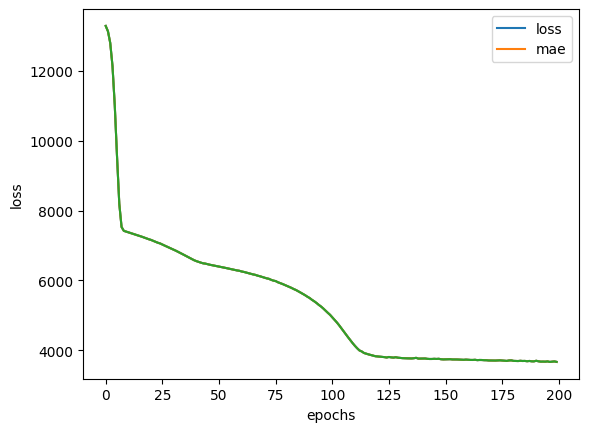

In [36]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.plot(history.history["loss"])

> ### How long should you train for?

It depnends. Really.. It depends on the problema you're training for. However, many eople hane asked this question before... so TensroFlow hs a solution! It's called the [EarlyStopping Callback](https://keras.io/api/callbacks/early_stopping/), which is a Tensorflow ccomponent you can add to your model to stop training once it stops improving a certain metrics.

## Preprocessing data (normalization and standardization)

in terms of scaling values, neural netwroks tendo to prefer normalization.

If touy're not sure which to use, you could try both and see which performs better.

In [37]:
X_train, y_train

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.950         2        True     False       True       False   
 1285   47  24.320         0        True     False       True       False   
 1142   52  24.860         0        True     False       True       False   
 969    39  34.320         5        True     False       True       False   
 486    54  21.470         3        True     False       True       False   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1095   18  31.350         4        True     False       True       False   
 1130   39  23.870         5        True     False       True       False   
 1294   58  25.175         0       False      True       True       False   
 860    37  47.600         2        True     False      False        True   
 1126   55  29.900         0       False      True       True       False   
 
       region_northeast  region_northwest  region_southeast  region_southw

<Axes: ylabel='Frequency'>

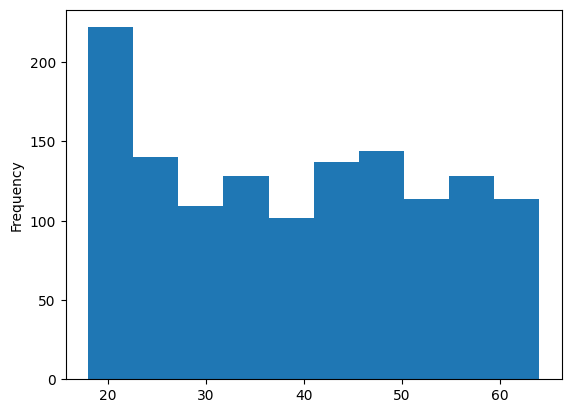

In [38]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

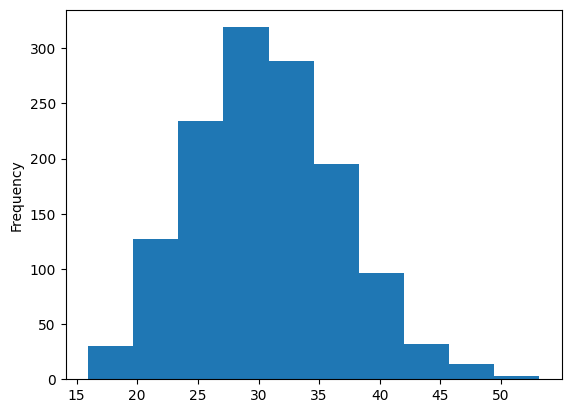

In [39]:
X["bmi"].plot(kind="hist")

In [50]:

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Sckit-Learn

In [46]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [51]:
# Create a column transformer

ct = make_column_transformer(
      (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
      (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
    )

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [52]:
# Build oru train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Fite the column trnsadormer to our training
ct.fit_transform(X_train)

# Transform training and test data with normalization (MinMaxScaler) ans OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [54]:
# WHat does our dta look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [55]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Beautiful! Our data has been normalized and one hot encoded.
Now let's build a neural network model on it  and see how it goes.

In [56]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [58]:
# Build a neural network model to fit on our normlized data

tf.random.set_seed(42)

# 1. Cretae our model

insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)])

# 2. Compile the model

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model

history = insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.2949 - mae: 13343.2949
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.7500 - mae: 13333.7500
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13311.2412 - mae: 13311.2412
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13265.6787 - mae: 13265.6787
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13186.0566 - mae: 13186.0566
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13061.2461 - mae: 13061.2461
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12880.7354 - mae: 12880.7354
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12634.3018 - mae: 12634.3018
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12311.7822 - mae: 12311.7822
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11909.80

In [59]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3437.0078 - mae: 3437.0078


[3437.0078125, 3437.0078125]

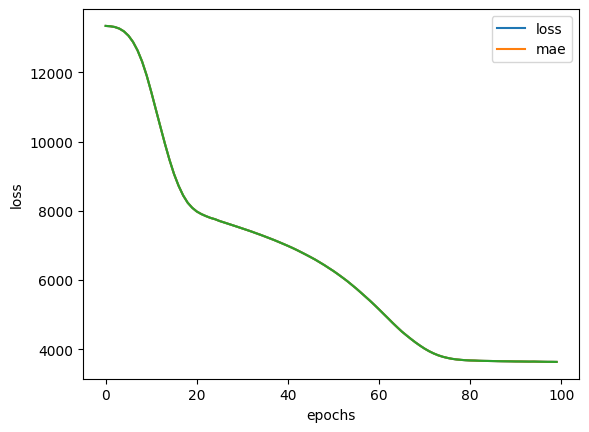

In [60]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.plot(history.history["loss"])

In [61]:
insurance_model_4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 100)               1200      
                                                                 
 dense_31 (Dense)            (None, 10)                1010      
                                                                 
 dense_32 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2221 (8.68 KB)
Trainable params: 2221 (8.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
